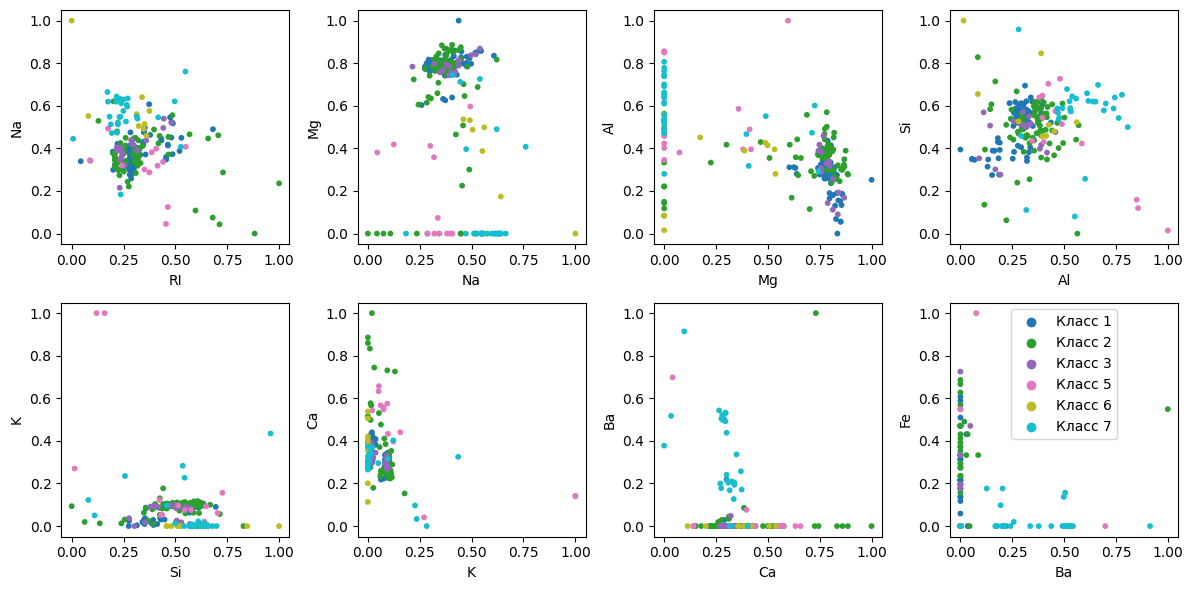

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

df = pd.read_csv("glass.csv")

var_names = list(df.columns)
labels = df.to_numpy(int)[:, -1]   
data = df.to_numpy(float)[:, :-1]  

data = preprocessing.minmax_scale(data)

unique_classes = np.unique(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))
class_to_color = {cls: colors[i] for i, cls in enumerate(unique_classes)}
point_colors = [class_to_color[l] for l in labels]

fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.ravel()

for i in range(data.shape[1] - 1):
    axs[i].scatter(data[:, i], data[:, i+1], c=point_colors, s=10)
    axs[i].set_xlabel(var_names[i])
    axs[i].set_ylabel(var_names[i+1])

for cls, col in class_to_color.items():
    plt.scatter([], [], c=[col], label=f"Класс {cls}")
plt.legend()

plt.tight_layout()
plt.show()


[0.47620525 0.26319276]
[25.28691265 18.79904076]


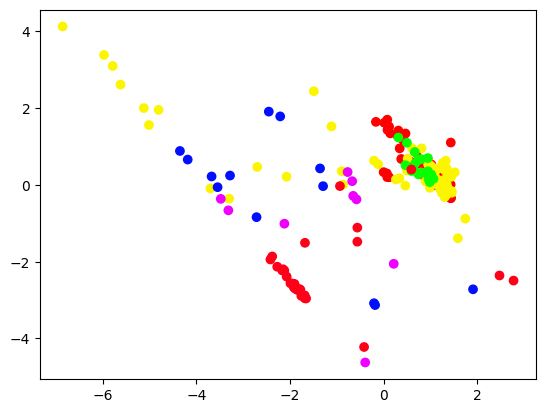

Минимальное число компонент для >=85% дисперсии: 4


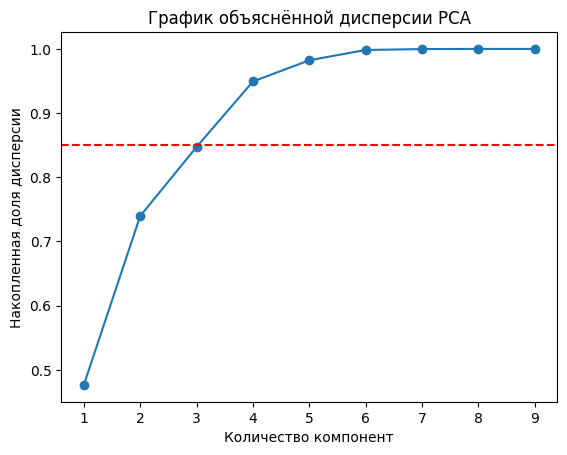

Среднеквадратичная ошибка восстановления: 0.03540034879137712

Оригинальные данные (первые 5 строк):
[[1.520e+00 1.364e+01 4.490e+00 1.100e+00 7.178e+01 6.000e-02 8.750e+00
  0.000e+00 0.000e+00]
 [1.520e+00 1.389e+01 3.600e+00 1.360e+00 7.273e+01 4.800e-01 7.830e+00
  0.000e+00 0.000e+00]
 [1.520e+00 1.353e+01 3.550e+00 1.540e+00 7.299e+01 3.900e-01 7.780e+00
  0.000e+00 0.000e+00]
 [1.520e+00 1.321e+01 3.690e+00 1.290e+00 7.261e+01 5.700e-01 8.220e+00
  0.000e+00 0.000e+00]
 [1.520e+00 1.327e+01 3.620e+00 1.240e+00 7.308e+01 5.500e-01 8.070e+00
  0.000e+00 0.000e+00]]

Восстановленные данные (первые 5 строк):
[[ 1.520e+00  1.370e+01  4.470e+00  9.900e-01  7.180e+01  1.500e-01
   8.760e+00 -5.000e-02  6.000e-02]
 [ 1.520e+00  1.380e+01  3.600e+00  1.370e+00  7.270e+01  3.900e-01
   7.810e+00  1.500e-01  4.000e-02]
 [ 1.520e+00  1.354e+01  3.540e+00  1.390e+00  7.301e+01  4.600e-01
   7.780e+00  9.000e-02  5.000e-02]
 [ 1.520e+00  1.324e+01  3.720e+00  1.330e+00  7.264e+01  6.000e-01
 

In [18]:
import pandas as pd
import numpy as np
df = pd.read_csv('glass.csv')
var_names = list(df.columns) #получение имен признаков
labels = df.to_numpy('int')[:,-1] #метки классов
data = df.to_numpy('float')[:,:-1] #описательные признаки

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_data = pca.fit(data).transform(data)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='hsv')
plt.show()

pca2= PCA().fit(data)

explained_variance = np.cumsum(pca2.explained_variance_ratio_)

n_components_85 = np.argmax(explained_variance >= 0.85) + 1
print("Минимальное число компонент для >=85% дисперсии:", n_components_85)

plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.axhline(y=0.85, color='r', linestyle='--')
plt.xlabel("Количество компонент")
plt.ylabel("Накопленная доля дисперсии")
plt.title("График объяснённой дисперсии PCA")
plt.show()

pca_opt = PCA(n_components=n_components_85)
pca_data = pca_opt.fit_transform(data)

restored = pca_opt.inverse_transform(pca_data)

mse = np.mean((data - restored) ** 2)
print("Среднеквадратичная ошибка восстановления:", mse)

print("\nОригинальные данные (первые 5 строк):")
print(np.round(data[:5], 2))
print("\nВосстановленные данные (первые 5 строк):")
print(np.round(restored[:5], 2))

solvers = ["auto", "full", "arpack", "randomized"]

for solver in solvers:
    try:
        pca = PCA(n_components=n_components_85, svd_solver=solver)
        pca_data = pca.fit_transform(data)
        restored = pca.inverse_transform(pca_data)
        mse = np.mean((data - restored) ** 2)
        explained = np.sum(pca.explained_variance_ratio_)
        print(f"\nsvd_solver = {solver}")
        print("  Объяснённая дисперсия:", round(explained, 4))
        print("  Среднеквадратичная ошибка восстановления:", round(mse, 6))
    except Exception as e:
        print(f"\nsvd_solver = {solver} -> ошибка: {e}")

Минимальное число компонент для >=85% дисперсии: 4


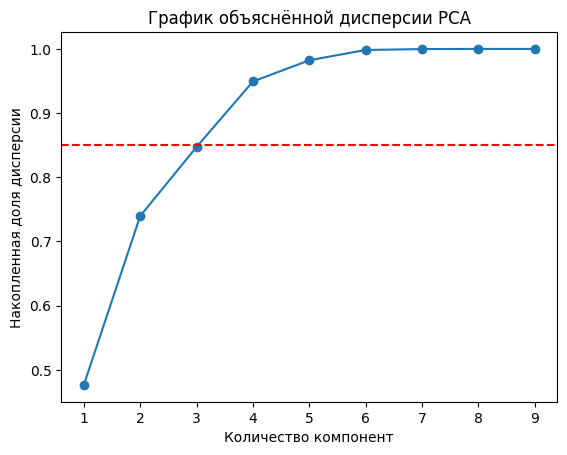

Среднеквадратичная ошибка восстановления: 0.03540034879137712

Оригинальные данные (первые 5 строк):
[[1.520e+00 1.364e+01 4.490e+00 1.100e+00 7.178e+01 6.000e-02 8.750e+00
  0.000e+00 0.000e+00]
 [1.520e+00 1.389e+01 3.600e+00 1.360e+00 7.273e+01 4.800e-01 7.830e+00
  0.000e+00 0.000e+00]
 [1.520e+00 1.353e+01 3.550e+00 1.540e+00 7.299e+01 3.900e-01 7.780e+00
  0.000e+00 0.000e+00]
 [1.520e+00 1.321e+01 3.690e+00 1.290e+00 7.261e+01 5.700e-01 8.220e+00
  0.000e+00 0.000e+00]
 [1.520e+00 1.327e+01 3.620e+00 1.240e+00 7.308e+01 5.500e-01 8.070e+00
  0.000e+00 0.000e+00]]

Восстановленные данные (первые 5 строк):
[[ 1.520e+00  1.370e+01  4.470e+00  9.900e-01  7.180e+01  1.500e-01
   8.760e+00 -5.000e-02  6.000e-02]
 [ 1.520e+00  1.380e+01  3.600e+00  1.370e+00  7.270e+01  3.900e-01
   7.810e+00  1.500e-01  4.000e-02]
 [ 1.520e+00  1.354e+01  3.540e+00  1.390e+00  7.301e+01  4.600e-01
   7.780e+00  9.000e-02  5.000e-02]
 [ 1.520e+00  1.324e+01  3.720e+00  1.330e+00  7.264e+01  6.000e-01
 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Загружаем данные
df = pd.read_csv('glass.csv')
var_names = list(df.columns)
labels = df.to_numpy('int')[:, -1]
data = df.to_numpy('float')[:, :-1]

# PCA без ограничения числа компонент (для анализа дисперсии)
pca_full = PCA().fit(data)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Определяем минимальное число компонент >=85%
n_components_85 = np.argmax(explained_variance >= 0.85) + 1
print("Минимальное число компонент для >=85% дисперсии:", n_components_85)

# Строим график дисперсии
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.85, color='r', linestyle='--')
plt.xlabel("Количество компонент")
plt.ylabel("Накопленная доля дисперсии")
plt.title("График объяснённой дисперсии PCA")
plt.show()

# PCA с оптимальным числом компонент
pca_opt = PCA(n_components=n_components_85)
pca_data = pca_opt.fit_transform(data)

# Восстановление данных
restored = pca_opt.inverse_transform(pca_data)

# Среднеквадратичная ошибка восстановления
mse = np.mean((data - restored) ** 2)
print("Среднеквадратичная ошибка восстановления:", mse)

# Сравнение первых 5 строк
print("\nОригинальные данные (первые 5 строк):")
print(np.round(data[:5], 2))
print("\nВосстановленные данные (первые 5 строк):")
print(np.round(restored[:5], 2))
